<a href="https://colab.research.google.com/github/Vaibhavrathore1999/ML-building-blocks/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Toy Dataset (House Size vs Price)
# --------------------------------------
X = np.array([800, 1000, 1200, 1400, 1600, 2000])
y = np.array([150, 200, 220, 240, 265, 310])

X = X.reshape(-1, 1)  # shape = (n, 1)
y = y.reshape(-1, 1)  # shape = (n, 1)
m = X.shape[0]

In [8]:
# --------------------------------------
# 2. Ordinary Linear Regression (Closed-form)
# --------------------------------------
# Add bias (intercept term)
X_b = np.hstack([np.ones((m, 1)), X])  # shape = (m, 2)

# Normal equation: theta = (X^T X)^-1 X^T y
theta_global = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict using global model
def predict_global(x):
    x_b = np.hstack([np.ones((x.shape[0], 1)), x])
    return x_b @ theta_global


In [9]:
# --------------------------------------
# 3. Locally Weighted Linear Regression (LWLR)
# --------------------------------------
def gaussian_weight(x_query, x_train, tau):
    # Returns weights for each training point based on proximity to x_query
    return np.exp(-np.square(x_query - x_train) / (2 * tau ** 2))

def lwlr_predict(x_query, X_train, y_train, tau):
    m = X_train.shape[0]
    # Compute weights
    weights = gaussian_weight(x_query, X_train, tau)
    W = np.diagflat(weights)

    # Add bias
    X_b = np.hstack([np.ones((m, 1)), X_train])      # shape: (m, 2)
    xq_b = np.array([[1, x_query]])                 # shape: (1, 2)

    # Weighted normal equation: θ = (Xᵀ W X)^(-1) Xᵀ W y
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y_train)
    return float(xq_b @ theta)

In [10]:
# Predict for all x_test using LWLR
x_test = np.linspace(700, 2100, 300).reshape(-1, 1)
tau = 300  # Try changing tau to see effect
lwlr_preds = np.array([lwlr_predict(x[0], X, y, tau) for x in x_test])
global_preds = predict_global(x_test)

<ipython-input-9-8d33b2e51fe7>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(xq_b @ theta)


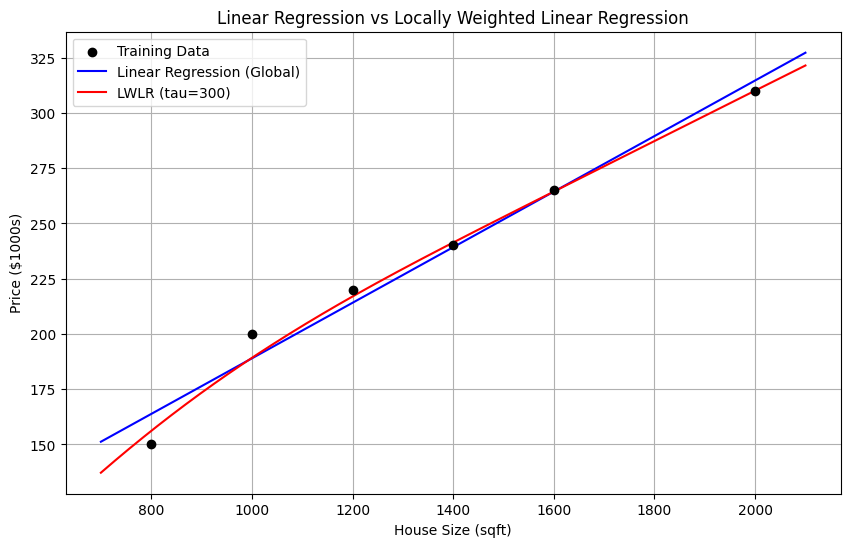

In [11]:
# -----------------------
# Plotting
# -----------------------
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Training Data', zorder=5)
plt.plot(x_test, global_preds, label='Linear Regression (Global)', color='blue')
plt.plot(x_test, lwlr_preds, label=f'LWLR (tau={tau})', color='red')
plt.xlabel("House Size (sqft)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression vs Locally Weighted Linear Regression")
plt.legend()
plt.grid(True)
plt.show()